## 1. Gráfico de Superfície 3D

**Descrição**

O Gráfico de Superfície 3D é uma representação tridimensional que desenha uma superfície conectando pontos de dados. Ele é ideal para visualizar como uma variável (representada no eixo Z, a altura) varia em função de outras duas variáveis independentes (representadas nos eixos X e Y).

---

**Onde pode ser aplicado?**

Este tipo de gráfico é muito utilizado em campos científicos e de engenharia para:
* Mapeamento topográfico, mostrando a altitude (Z) em relação à latitude (X) e longitude (Y).
* Visualização de funções matemáticas complexas.
* Análise de dados de sensores, como a distribuição de temperatura (Z) sobre uma placa de metal (X e Y).
* Em análise de dados, como no nosso exemplo, para ver a frequência de um evento (acidentes) em função de duas variáveis de tempo (dia da semana e hora).

---

**Que tipo de informação pode ser extraída?**

A partir de um gráfico de superfície, podemos extrair:
* **Picos e Vales:** Identificar rapidamente os pontos de máximo (picos) e mínimo (vales) na superfície dos dados.
* **Padrões e Tendências:** Entender como as três variáveis se relacionam. Por exemplo, podemos ver se a frequência de acidentes aumenta consistentemente em um horário específico, independentemente do dia.
* **A "Forma" dos Dados:** Ter uma intuição visual da distribuição geral dos dados no espaço tridimensional.

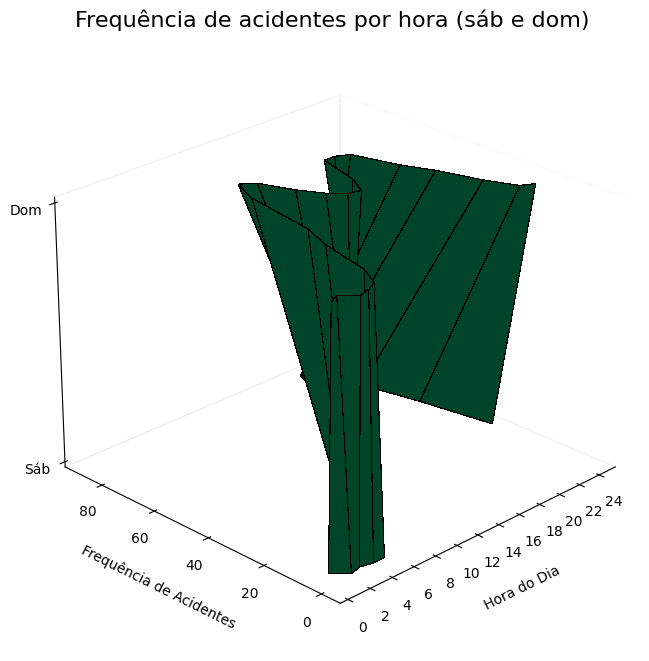

In [1]:
# Importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Eixo X: Horas de 1 a 24
horas = np.arange(1, 25)

# Eixo Z: Frequência de acidentes para Sábado e Domingo
freq_sabado = np.array([5, 2, 1, 2, 4, 8, 15, 25, 30, 28, 25, 35, 40, 45, 50, 48, 55, 60, 75, 85, 90, 70, 50, 30]) + np.random.randint(-5, 5, 24)
freq_domingo = np.array([8, 4, 2, 3, 6, 12, 25, 40, 60, 75, 70, 60, 55, 50, 48, 55, 65, 70, 68, 55, 40, 30, 20, 15]) + np.random.randint(-5, 5, 24)

# Garante que não há valores negativos
freq_sabado[freq_sabado < 0] = 0
freq_domingo[freq_domingo < 0] = 0

# Eixo Y: Dias da semana (0 para Sábado, 1 para Domingo)
dias_idx = np.array([0, 1])

# Preparação dos Dados para o Gráfico 3D
X, Y = np.meshgrid(horas, dias_idx)
Z = np.array([freq_sabado, freq_domingo])

# Criação e Customização do Gráfico
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar a superfície
surf = ax.plot_surface(X, Z, Y, cmap='YlGn_r', rstride=1, cstride=1, antialiased=False, edgecolor='black', linewidth=0.1)

# Título e Rótulos
ax.set_title('Frequência de acidentes por hora (sáb e dom)', fontsize=16)
ax.set_xlabel('Hora do Dia', labelpad=10)
ax.set_zlabel('Dia da semana', labelpad=10)
ax.set_ylabel('Frequência de Acidentes', labelpad=10)

# Ajustar os marcadores dos eixos
ax.set_xticks(np.arange(0, 25, 2))
ax.set_zticks([0, 1])
ax.set_zticklabels(['Sáb', 'Dom'])

# Ajustar o ângulo de visão
ax.view_init(elev=25, azim=-135)

# Estilo visual
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)

# Mostrar o gráfico
plt.show()

## 2. Gráfico de Linha 

**Descrição**

O gráfico de linha é ideal para representar dados contínuos ou dados com muitos pontos ao longo do tempo. Ele conecta pontos de dados individuais com uma linha, tornando fácil visualizar tendências, padrões e flutuações. Por exemplo, o gráfico de referência destaca o aumento nas buscas por palavras-chave “trabalho remoto” nos EUA durante a pandemia.

---

**Quando usar gráficos de linha?**

* Para comparar e apresentar muitos dados de uma vez.
* Para mostrar tendências ou progresso ao longo do tempo.
* Para destacar aceleração ou desaceleração em uma série de dados.
* Para apresentar dados de previsão e compartilhar a incerteza.

---

**Melhores práticas para gráficos de linha**

* **Use linhas contínuas:** Linhas pontilhadas ou tracejadas podem ser distrativas.
* **Ordene os pontos de forma consistente:** Geralmente por tempo ou outra variável contínua.
* **Rotule as linhas diretamente:** Se houver mais de uma linha, é preferível rotulá-las diretamente em vez de usar uma legenda separada.
* **Não exagere no número de linhas:** Tente não representar mais de quatro linhas para evitar poluição visual.
* **Linha de base em zero:** Não é estritamente necessária como em gráficos de barra, mas é recomendada para evitar distorções na percepção da magnitude das mudanças.

> **Dica profissional de Mike Cisneros (visualizador de dados):**
> **(site piktochart.com)**
> “A faixa do seu menor valor para o seu maior valor deve ocupar cerca de 70 a 80 por cento do espaço vertical disponível no seu gráfico.”

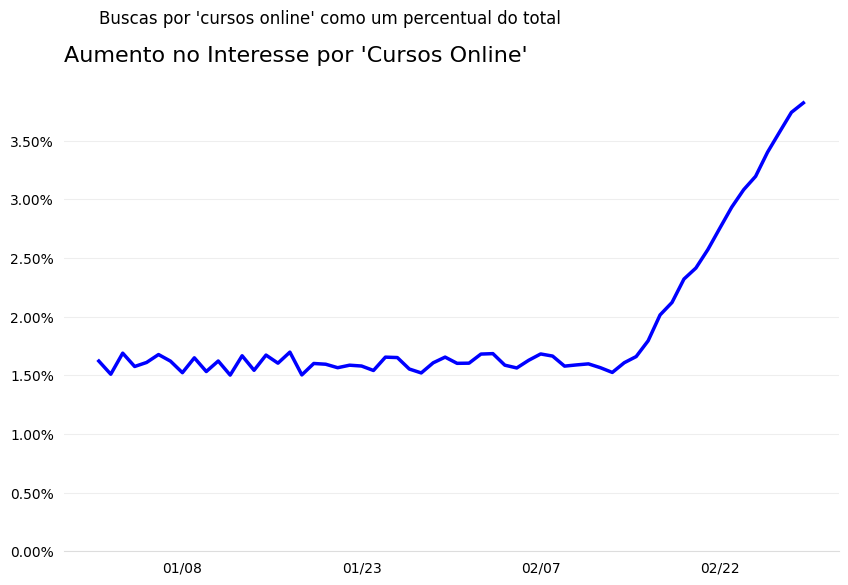

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter

# Criando uma série de datas para o eixo X
datas = pd.date_range(start='2025-01-01', periods=60, freq='D')

# Criando dados para o eixo Y que imitam o padrão: estável e depois um surto de crescimento
periodo_estavel = 1.5 + np.random.rand(45) * 0.2
periodo_crescimento = periodo_estavel[-1] + np.linspace(0, 2.2, 15) + np.random.rand(15) * 0.1 #
interesse = np.concatenate([periodo_estavel, periodo_crescimento]) / 100 

# Criação do Gráfico ---
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar os dados
ax.plot(datas, interesse, color='blue', linewidth=2.5)

# Título e subtítulo
ax.set_title("Aumento no Interesse por 'Cursos Online'", fontsize=16, loc='left', pad=20)
ax.text(x=datas[0], y=0.045, s="Buscas por 'cursos online' como um percentual do total", fontsize=12)

# Formatar o eixo Y para mostrar porcentagens
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_ylim(0) # Iniciar eixo Y em 0, como recomendado

# Formatar o eixo X para mostrar as datas de forma clara
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15)) # Marcadores a cada 15 dias
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# Remover as bordas do gráfico para um visual mais limpo
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Ajustar os ticks
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)


# Mostrar o gráfico
plt.show()

## 3. Gráfico de Dispersão

**Descrição**

Um gráfico de dispersão ajuda a mostrar a relação entre itens com base em duas variáveis diferentes. Os pontos são plotados em um sistema de coordenadas x-y para representar cada par de valores. Em muitos casos, uma linha de tendência (ou linha de regressão) é adicionada para evidenciar a força e a direção da correlação entre as variáveis.

---

**Quando usar um gráfico de dispersão?**

* Para visualizar e confirmar se existe uma relação (correlação) entre duas variáveis.
* Quando se tem duas variáveis de dados que se complementam e se deseja entender como uma se comporta quando a outra muda.
* Para identificar padrões, agrupamentos (clusters) e pontos fora da curva (outliers) nos dados.

---

**Melhores práticas para gráficos de dispersão**

* **Comece o eixo Y em zero:** Isso ajuda a representar os dados com mais precisão e evita distorções.
* **Use tamanho e cor:** É possível plotar variáveis adicionais alterando o tamanho e a cor dos pontos para enriquecer a análise.
* **Destaque com anotações:** Use cores ou textos para destacar pontos ou grupos de interesse.

> **Dica profissional de Mike Yi (Chartio):**
> **(site piktochart.com)**
> “Adicione uma linha de tendência ao seu gráfico de dispersão se desejar indicar o quão forte é a relação entre as duas variáveis e se há pontos incomuns que afetam o cálculo da linha de tendência.”

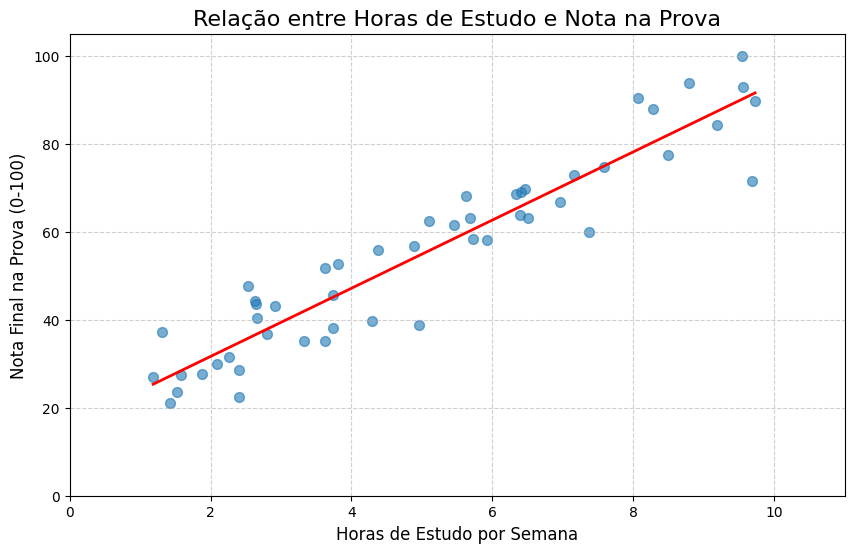

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Simulação de correlação positiva entre horas de estudo e a nota em uma prova.
np.random.seed(42)
num_alunos = 50

# Horas de estudo: um valor aleatório entre 1 e 10
horas_estudo = np.random.rand(num_alunos) * 9 + 1

# Nota na prova: baseada nas horas de estudo + um pouco de variação aleatória (ruído)
# Fórmula: nota = (horas * 8) + 15 + ruído
nota_prova = (horas_estudo * 8) + 15 + (np.random.randn(num_alunos) * 8)

# Garantir que as notas fiquem entre 0 e 100
nota_prova = np.clip(nota_prova, 0, 100)

# Criação do Gráfico com Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x=horas_estudo, 
            y=nota_prova, 
            ci=None, # Remove a sombra de intervalo de confiança
            scatter_kws={'alpha': 0.6, 's': 50},
            line_kws={'color': 'red', 'linewidth': 2})

plt.title('Relação entre Horas de Estudo e Nota na Prova', fontsize=16)
plt.xlabel('Horas de Estudo por Semana', fontsize=12)
plt.ylabel('Nota Final na Prova (0-100)', fontsize=12)

# Definir os limites dos eixos, começando em zero
plt.xlim(0, 11)
plt.ylim(0, 105)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 3. Gráfico Circular

**Descrição**

Os gráficos circulares (ou gráficos de pizza) são utilizados para destacar dados e estatísticas no formato de fatias, onde cada fatia representa uma porcentagem de um todo. A soma total de todas as fatias deve sempre totalizar 100 por cento. São mais impactantes e fáceis de interpretar quando se trabalha com um pequeno conjunto de categorias de dados. O "donut chart" é uma variação que possui um orifício central, permitindo a exibição de um elemento de design ou o valor total das variáveis no centro.

---

**Quando usar gráficos circulares?**

* Para ilustrar comparações de parte para o todo, seja em gráficos de negócios ou em apresentações educacionais.
* Para identificar os itens menores e maiores dentro de conjuntos de dados.
* Para comparar diferenças proporcionais entre várias partes de um conjunto de dados.

---

**Melhores práticas para o uso de gráficos circulares**

* **Limite as categorias:** É recomendado limitar o número de categorias a 3-5 para garantir uma diferenciação clara e evitar a desorganização visual.
* **Total de 100%:** Verifique sempre se o valor total das fatias equivale a 100 por cento.
* **Agrupe fatias semelhantes:** Se houver muitas categorias pequenas, agrupe-as numa fatia "Outros" para reduzir a desorganização.
* **Destaque com cor:** Destaque a fatia mais importante com uma cor primária e use tons dessa cor ou cores complementares para o restante.
* **Ordene as fatias cuidadosamente:** Uma prática comum é colocar a maior seção na posição das 12 horas e seguir no sentido horário a partir daí, ou a segunda maior seção na posição das 12 horas e seguir no sentido anti-horário.

> **Dica profissional de Robert Kosara (Eager Eyes):**
> **(site piktochart.com)**
> “O gráfico circular é o tipo errado de gráfico para usar como padrão; o gráfico de barras é uma escolha muito melhor para isso. Usar um gráfico circular requer muito mais reflexão, cuidado e conscientização de suas limitações do que a maioria dos outros gráficos.”

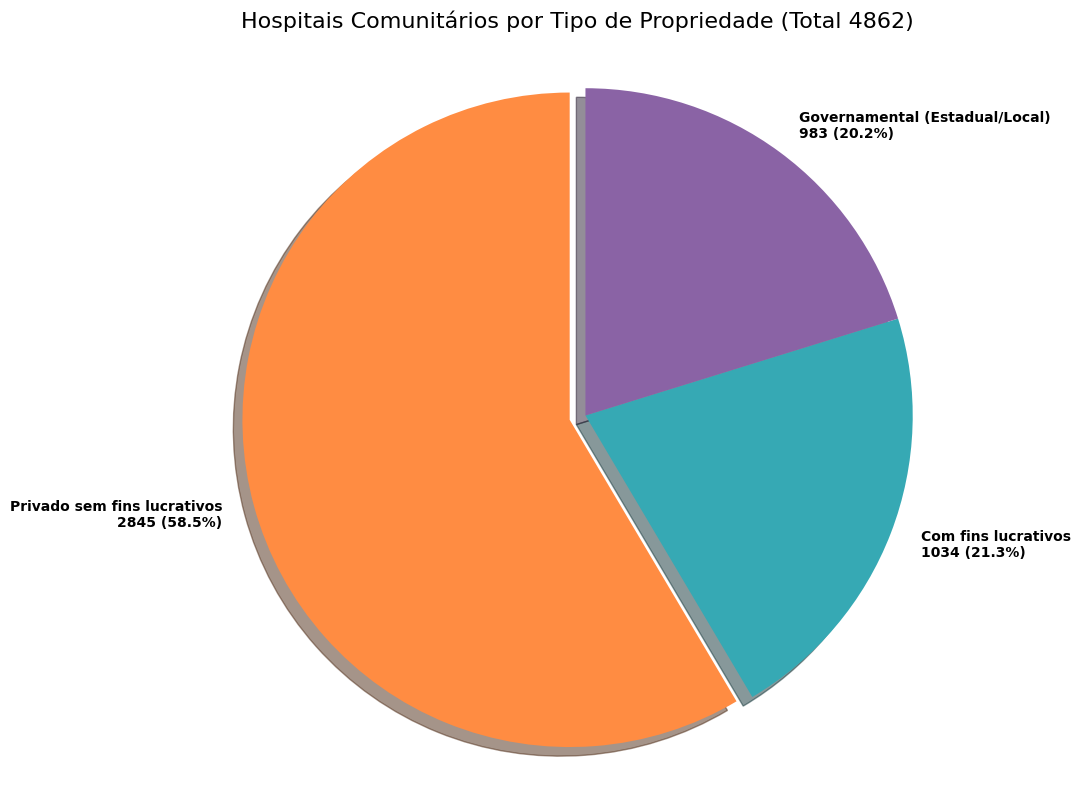

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Dados de exemplo para Tipos de Propriedade de Hospitais Comunitários
labels = ['Privado sem fins lucrativos', 'Com fins lucrativos', 'Governamental (Estadual/Local)']
sizes = [2845, 1034, 983] # Valores que somam 4862 (total fictício)
total_hospitais = sum(sizes)

# Calcular porcentagens
percentages = [(s / total_hospitais) * 100 for s in sizes]

# Combinar labels, sizes e percentages para as fatias
# Criando labels mais detalhadas para o gráfico
pie_labels = [f'{label}\n{size} ({p:.1f}%)' for label, size, p in zip(labels, sizes, percentages)]

# Cores para as fatias (escolhidas para se assemelhar ao exemplo)
colors = ['#ff8c42', '#36a9b4', '#8a63a5']

# explode: afasta a fatia do centro
explode = (0.05, 0, 0)

plt.figure(figsize=(10, 8))
plt.pie(sizes,
        explode=explode,
        labels=pie_labels,
        colors=colors,
        autopct='', 
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 10, 'weight': 'bold', 'color': 'black'}) # Estilo do texto nas fatias

# Adicionar um título ao gráfico
plt.title(f'Hospitais Comunitários por Tipo de Propriedade (Total {total_hospitais})', fontsize=16, pad=20)

# Garante que o gráfico seja desenhado como um círculo perfeito.
plt.axis('equal')

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

## 4. Gráfico de Mosaico
**Descrição**

Um gráfico de mosaico é uma representação gráfica de dados categóricos multivariados. Ele consiste em um grid retangular que apresenta a frequência ou proporção das variáveis. A área de cada retângulo corresponde à proporção de ocorrências de uma categoria, considerando as múltiplas variáveis envolvidas.

---

**Quando usar gráficos de mosaico?**

* Quando você deseja visualizar a distribuição de variáveis categóricas em diferentes categorias.
* Se estiver tentando entender a relação entre duas ou mais variáveis categóricas.
* Quando precisa mostrar relações hierárquicas dentro dos dados (a forma como um grupo se subdivide em outros).

---

**Melhores práticas para gráficos de mosaico**

* **Use cores contrastantes:** Isso ajuda a distinguir claramente entre as categorias.
* **Forneça uma legenda clara:** A legenda é essencial para explicar as categorias e a codificação de cores.
* **Garanta a proporção correta:** O tamanho de cada retângulo deve representar com precisão a proporção daquela categoria nos dados.

> **Dica profissional de David Farrugia (Cientista de Dados):**
> “Gráficos de mosaico podem rapidamente se tornar intricados se o número de categorias for muito alto ou se as categorias demonstrarem uma distribuição uniforme.”

Tabela de Contingência dos Dados:
Tratamento    Medicamento do Estudo  Placebo
Grupo Etário                                
Idoso                           232      168
Não Idoso                       408      192


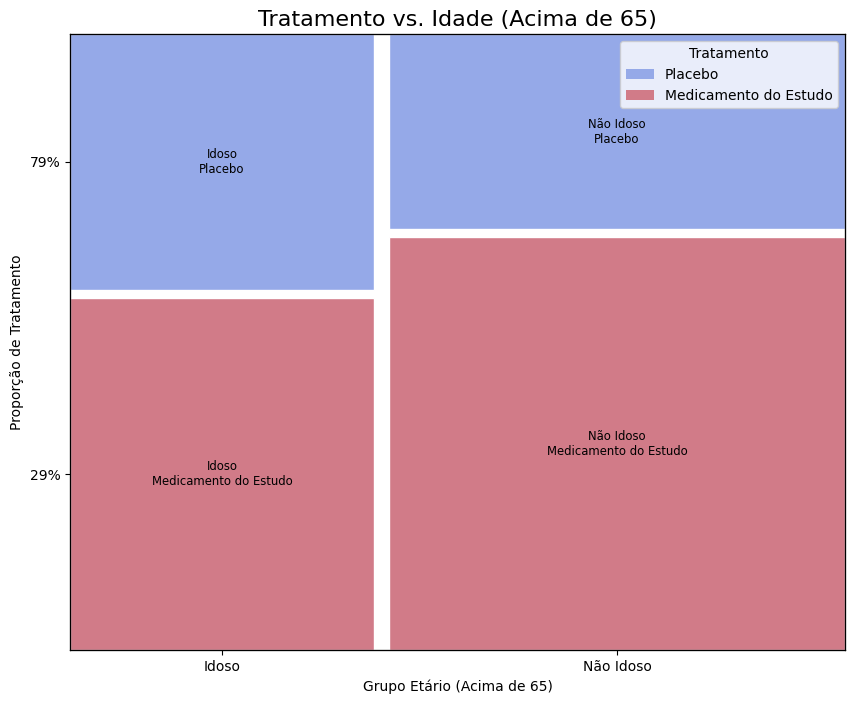

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic

# --- 1. Geração de Dados Fictícios ---
# Vamos criar dados que representam a relação entre um grupo etário e um tipo de tratamento.
# A estrutura dos dados é uma lista de tuplas: (Grupo Etário, Tratamento)
data_list = [('Idoso', 'Placebo')] * 168 + \
            [('Idoso', 'Medicamento do Estudo')] * 232 + \
            [('Não Idoso', 'Placebo')] * 192 + \
            [('Não Idoso', 'Medicamento do Estudo')] * 408

df = pd.DataFrame(data_list, columns=['Grupo Etário', 'Tratamento'])

# Para o gráfico de mosaico, precisamos de uma tabela de contingência (cruzamento)
# O pandas.crosstab faz isso perfeitamente.
data_crosstab = pd.crosstab(df['Grupo Etário'], df['Tratamento'])

print("Tabela de Contingência dos Dados:")
print(data_crosstab)

# --- 2. Criação do Gráfico de Mosaico ---
# O gráfico de mosaico da statsmodels usa um dicionário para os dados.
data_dict = data_crosstab.stack().to_dict()

# Configurar as cores para cada categoria
props = {
    ('Idoso', 'Placebo'): {'facecolor': '#95a9e8', 'edgecolor': 'white'},
    ('Idoso', 'Medicamento do Estudo'): {'facecolor': '#d17b88', 'edgecolor': 'white'},
    ('Não Idoso', 'Placebo'): {'facecolor': '#95a9e8', 'edgecolor': 'white'},
    ('Não Idoso', 'Medicamento do Estudo'): {'facecolor': '#d17b88', 'edgecolor': 'white'}
}

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 8))
mosaic(data_dict, ax=ax, properties=lambda key: props[key], gap=0.02)

# --- 3. Customização do Gráfico ---
# Adicionar um título
ax.set_title('Tratamento vs. Idade (Acima de 65)', fontsize=16)

# Configurar os rótulos dos eixos
ax.set_xlabel('Grupo Etário (Acima de 65)')
ax.set_ylabel('Proporção de Tratamento')

# Criar a legenda manualmente
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#95a9e8', label='Placebo'),
                   Patch(facecolor='#d17b88', label='Medicamento do Estudo')]
ax.legend(handles=legend_elements, title='Tratamento', loc='upper right')

# Formatar o eixo Y para mostrar porcentagens
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

plt.show()

## 5. Gráfico de Pareto

**Descrição**

Um gráfico de Pareto é um tipo de gráfico que combina barras e um gráfico de linhas. As barras representam valores individuais de categorias, ordenadas em ordem decrescente, enquanto a linha indica o total cumulativo dessas categorias em porcentagem. Este gráfico é nomeado em homenagem a Vilfredo Pareto, que desenvolveu o **Princípio de Pareto**, também conhecido como a **regra 80/20**, que postula que, para muitos eventos, aproximadamente 80% dos efeitos vêm de 20% das causas.

---

**Quando usar gráficos de Pareto?**

* Quando você deseja priorizar problemas ou causas em um processo para focar os esforços de melhoria.
* Se você precisa identificar as causas mais significativas de um problema.
* Quando deseja demonstrar visualmente o princípio de Pareto (regra 80/20) em um conjunto de dados.

---

**Melhores práticas para gráficos de Pareto**

* **Ordene as categorias:** Os dados devem ser sempre ordenados do maior para o menor.
* **Eixos bem definidos:** O eixo vertical esquerdo (frequência) deve começar em 0, e o eixo vertical direito (cumulativo) deve ir até 100%.
* **Rótulos claros:** As categorias no eixo X devem ser rotuladas de forma clara e concisa para fácil entendimento.

> **Dica profissional de Evan Sunwell (Especialista em Experiência do Usuário):**
> “Investir exclusivamente nos '20% vitais' por muito tempo pode levar à estagnação e à superotimização de algumas métricas em detrimento de outras. Isso também pode reforçar a crença de que apenas algumas métricas devem orientar a visão do produto. Evite essa armadilha do pensamento tudo ou nada.”

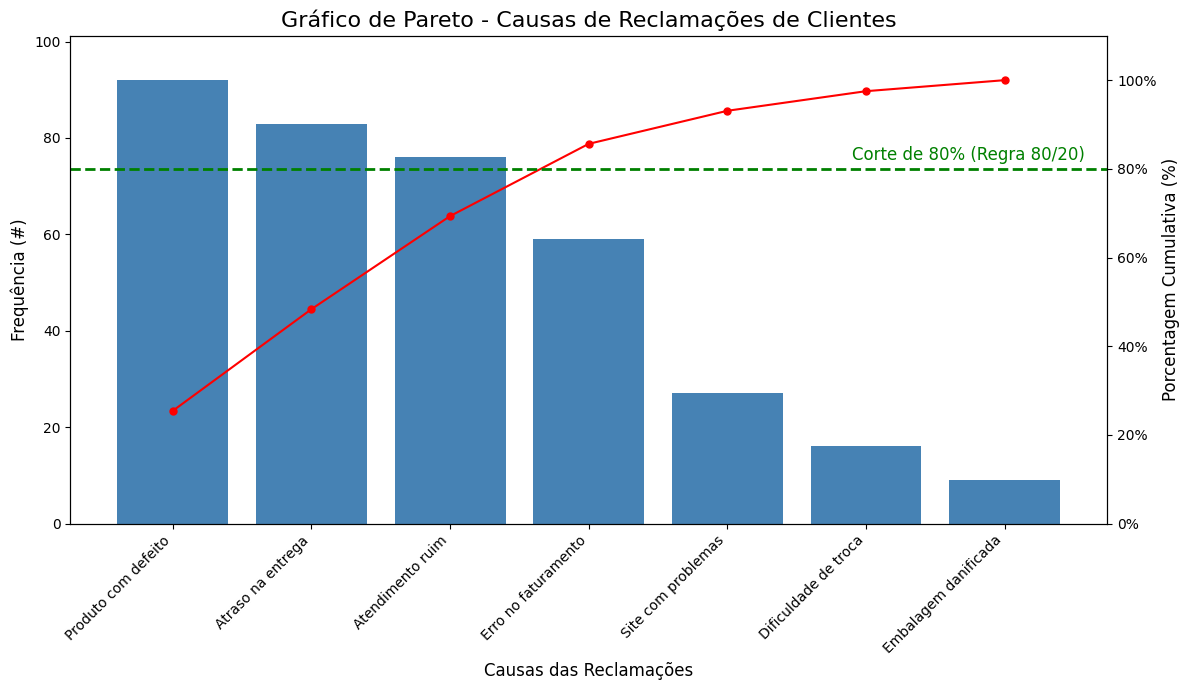

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import PercentFormatter

# Simulando causas de reclamações de clientes em uma empresa
data = {'Causa': ['Produto com defeito', 'Atraso na entrega', 'Atendimento ruim', 'Erro no faturamento', 'Site com problemas', 'Dificuldade de troca', 'Embalagem danificada'],
        'Frequência': [92, 83, 76, 59, 27, 16, 9]}

df = pd.DataFrame(data)

# Ordenar os dados pela frequência, do maior para o menor (essencial para Pareto)
df = df.sort_values(by='Frequência', ascending=False)

# Calcular a porcentagem cumulativa
df['Porcentagem Cumulativa'] = (df['Frequência'].cumsum() / df['Frequência'].sum()) * 100

# Criação do Gráfico de Pareto ---
# Configurar a figura e o primeiro eixo (para as barras)
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plotar as barras de frequência
ax1.bar(df['Causa'], df['Frequência'], color='steelblue')
ax1.set_xlabel('Causas das Reclamações', fontsize=12)
ax1.set_ylabel('Frequência (#)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Criar o segundo eixo (para a linha cumulativa) que compartilha o mesmo eixo X
ax2 = ax1.twinx()

# Plotar a linha de porcentagem cumulativa
ax2.plot(df['Causa'], df['Porcentagem Cumulativa'], color='red', marker='o', ms=5)
ax2.set_ylabel('Porcentagem Cumulativa (%)', fontsize=12)

# Formatar o segundo eixo Y para mostrar o símbolo de '%'
ax2.yaxis.set_major_formatter(PercentFormatter())

# Definir os limites dos eixos
ax1.set_ylim(0, df['Frequência'].max() * 1.1)
ax2.set_ylim(0, 110)

# Adicionar a linha de 80% para a regra 80/20
ax2.axhline(y=80, color='green', linestyle='--', linewidth=2)
ax2.text(len(df['Causa'])*0.7, 82, 'Corte de 80% (Regra 80/20)', color='green', fontsize=12)

# Título
plt.title('Gráfico de Pareto - Causas de Reclamações de Clientes', fontsize=16)

plt.tight_layout()
plt.show()

## 6. Gráfico de Barras Empilhadas

**Descrição**

Um gráfico de barras empilhadas é uma variação do gráfico de barras padrão que permite dividir e comparar partes de um todo. Cada barra no gráfico representa um total, e os segmentos coloridos que compõem a barra representam diferentes categorias ou partes que contribuem para esse total.

---

**Quando usar gráficos de barras empilhadas?**

* Quando você precisa comparar o valor total entre diferentes categorias e, ao mesmo tempo, entender a composição de cada total.
* Se você deseja visualizar relações de "parte para o todo" de forma comparativa.
* Quando deseja mostrar como uma categoria principal é dividida em subcategorias.

---

**Melhores práticas para gráficos de barras empilhadas**

* **Use cores contrastantes:** Para diferenciar claramente entre os segmentos.
* **Organize os segmentos consistentemente:** A ordem das cores (segmentos) deve ser a mesma em todas as barras para facilitar a comparação.
* **Inclua uma legenda:** A legenda é crucial para que o leitor saiba o que cada cor representa.

> **Dica profissional de Vitaly Radionov (Especialista em Visualização de Dados):**
> “Gráficos de barras empilhadas são projetados para ajudá-lo a comparar simultaneamente totais e notar mudanças nítidas no nível do item que provavelmente terão mais influência nos movimentos nos totais das categorias.”

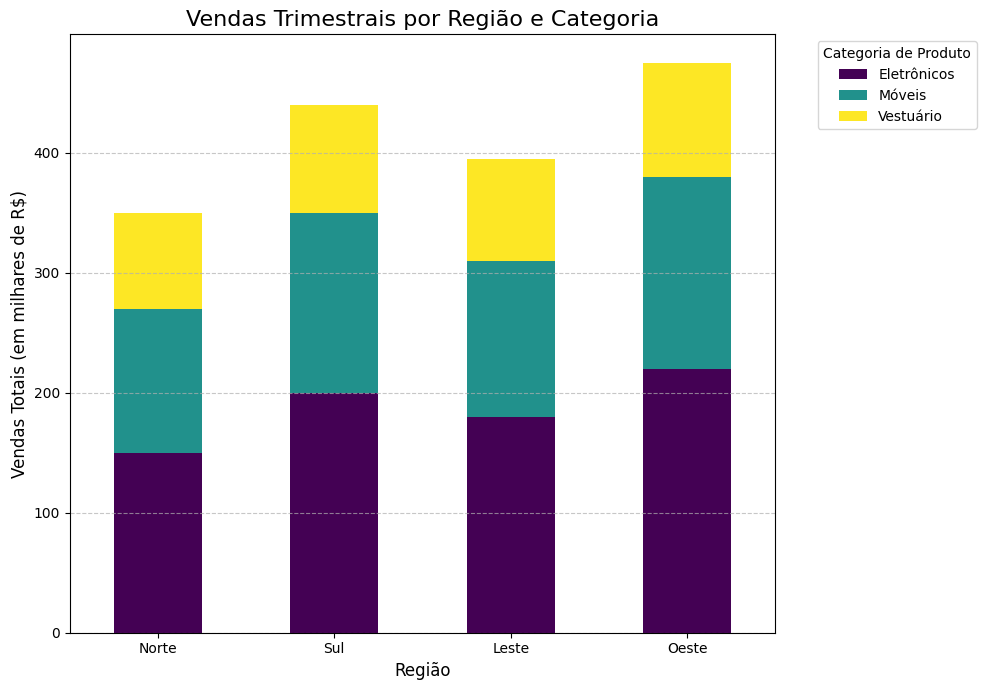

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Simulando vendas trimestrais de diferentes categorias de produtos por região.
regioes = ['Norte', 'Sul', 'Leste', 'Oeste']
vendas_eletronicos = [150, 200, 180, 220]
vendas_moveis = [120, 150, 130, 160]
vendas_vestuario = [80, 90, 85, 95]

# Criar um DataFrame do Pandas, que é ideal para este tipo de gráfico
df_vendas = pd.DataFrame({
    'Eletrônicos': vendas_eletronicos,
    'Móveis': vendas_moveis,
    'Vestuário': vendas_vestuario
}, index=regioes)

# O próprio Pandas facilita muito a criação deste gráfico
ax = df_vendas.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 7),
    colormap='viridis'
)

# Títulos e rótulos
plt.title('Vendas Trimestrais por Região e Categoria', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Vendas Totais (em milhares de R$)', fontsize=12)

# Rotacionar os rótulos do eixo X para ficarem horizontais
plt.xticks(rotation=0)

# Melhorar a legenda
plt.legend(title='Categoria de Produto', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar um grid para facilitar a leitura dos valores
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 7. Gráfico de Bolhas

**Descrição**

Um gráfico de bolhas, ou gráfico de pontos, é muito parecido com um gráfico de dispersão. A principal diferença é que os gráficos de bolhas adicionam mais uma ou duas dimensões visuais aos dados: o **tamanho** e/ou a **cor** dos pontos (as "bolhas"). Isso permite representar uma terceira e até uma quarta variável numérica ou categórica em um único gráfico, tornando-o muito denso em informações.

---

**Quando usar um gráfico de bolhas?**

* Para mostrar as relações entre três ou mais variáveis numéricas de forma simultânea.
* Para analisar dados financeiros ou de portfólio, onde cada bolha pode representar um ativo ou produto com diferentes métricas.
* Para comparar categorias em várias métricas ao mesmo tempo.

---

**Melhores práticas para gráficos de bolhas**

* **Escala pela área:** A área da bolha (e não o raio ou diâmetro) deve ser proporcional ao valor que ela representa para evitar distorções na percepção.
* **Use apenas círculos:** Evite usar formas diferentes, pois a área de quadrados, triângulos etc., é mais difícil de comparar visualmente.
* **Rotule os pontos-chave:** Anote as bolhas mais importantes ou que representam outliers para dar contexto ao leitor.

> **Dica profissional de Elizabeth Ricks (Instrutora de Visualização de Dados):**
> “Inclua palavras em gráficos de bolhas estáticos. Sempre é uma boa ideia rotular seus eixos, fornecer títulos de gráfico claros e anotar pontos de dados importantes com contexto esclarecedor. Isso é especialmente verdade quando você está usando um tipo de gráfico denso em dados, como um gráfico de bolhas.”

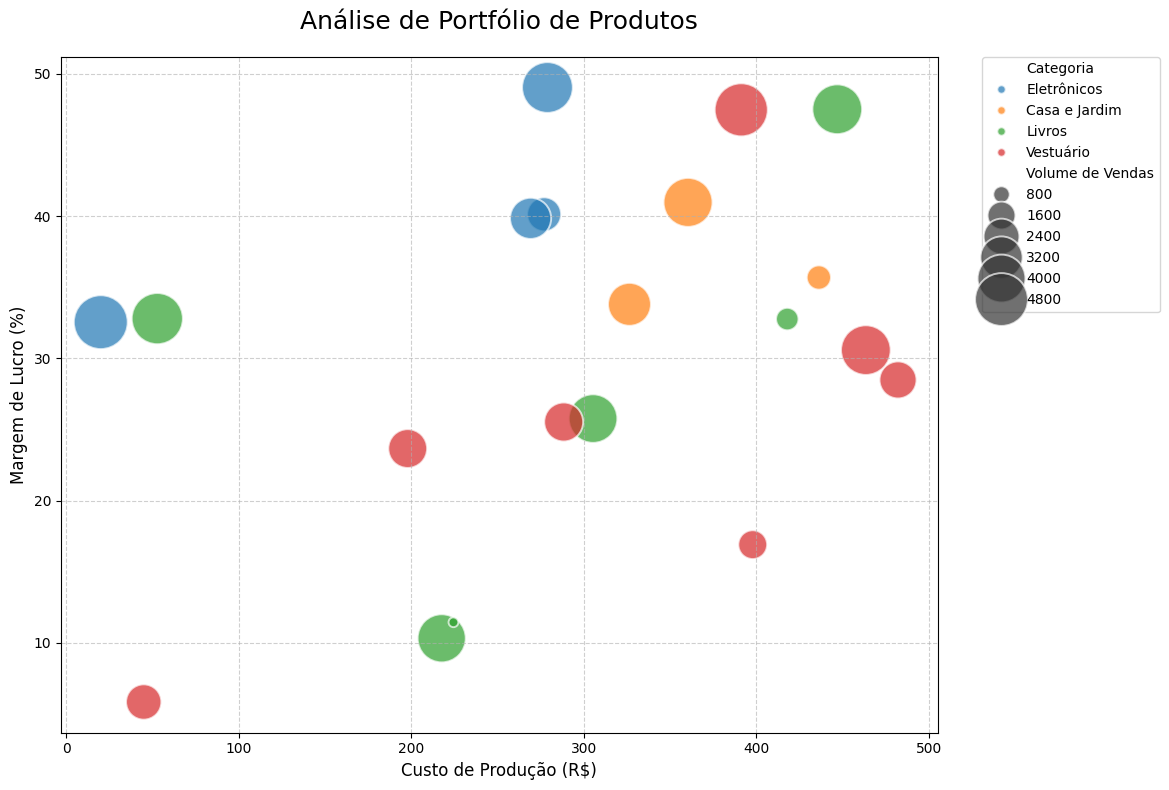

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Simulando uma análise de portfólio de 20 produtos com 4 variáveis.
np.random.seed(0)
num_produtos = 20

data = {
    'Produto': [f'Produto {i+1}' for i in range(num_produtos)],
    'Custo de Produção': np.random.uniform(10, 500, num_produtos),
    'Margem de Lucro (%)': np.random.uniform(5, 50, num_produtos),
    'Volume de Vendas': np.random.randint(100, 5000, num_produtos),
    'Categoria': np.random.choice(['Eletrônicos', 'Vestuário', 'Casa e Jardim', 'Livros'], num_produtos)
}
df_produtos = pd.DataFrame(data)

# Usando o scatterplot do Seaborn, que tem parâmetros para 'size' (tamanho) e 'hue' (cor).
plt.figure(figsize=(14, 8))
bubble_plot = sns.scatterplot(
    data=df_produtos,
    x='Custo de Produção',
    y='Margem de Lucro (%)',
    size='Volume de Vendas', 
    hue='Categoria',     
    sizes=(50, 1500),       
    alpha=0.7               
)

plt.title('Análise de Portfólio de Produtos', fontsize=18, pad=20)
plt.xlabel('Custo de Produção (R$)', fontsize=12)
plt.ylabel('Margem de Lucro (%)', fontsize=12)

# Mover a legenda para fora do gráfico para não cobrir os dados
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajusta o layout para dar espaço à legenda
plt.show()

## 8. Gráfico de Cascata
**Descrição**

Gráficos de cascata são um tipo de visualização de dados usada para mostrar como um valor inicial é aumentado e diminuído por uma série de valores intermediários, levando a um valor final. As barras parecem "flutuar", mostrando o efeito cumulativo de valores positivos ou negativos introduzidos sequencialmente.

---

**Quando usar gráficos de cascata?**

* Ao visualizar demonstrativos financeiros, como um Demonstrativo de Resultado do Exercício (DRE), para entender a composição do lucro.
* Se você precisa decompor o efeito cumulativo de valores positivos (ganhos) e negativos (perdas) em um valor inicial.
* Quando deseja mostrar a contribuição de diferentes elementos para um total (ex: como o número de funcionários de uma empresa mudou ao longo do ano, mostrando contratações e demissões).

---

**Melhores práticas para gráficos de cascata**

* **Rotule claramente:** Cada barra deve ser rotulada para descrever o que ela representa (ex: "Receita", "Custos", "Lucro").
* **Use cores contrastantes:** É uma prática padrão usar cores diferentes para valores positivos (aumentos), negativos (diminuições) e totais (ou subtotais).
* **Inclua barras de "total":** Use barras que começam do zero para representar o valor inicial, subtotais importantes e o valor final.

> **Dica profissional do Dr. Wayne Winston (Professor Emérito de Ciências da Decisão):**
> “Um gráfico de cascata destaca como um valor aumenta ou diminui ao longo do tempo para atingir um valor final. Gráficos de cascata são excelentes para contar a história de como uma quantidade de interesse (por exemplo, posição de caixa) muda ao longo do tempo.”

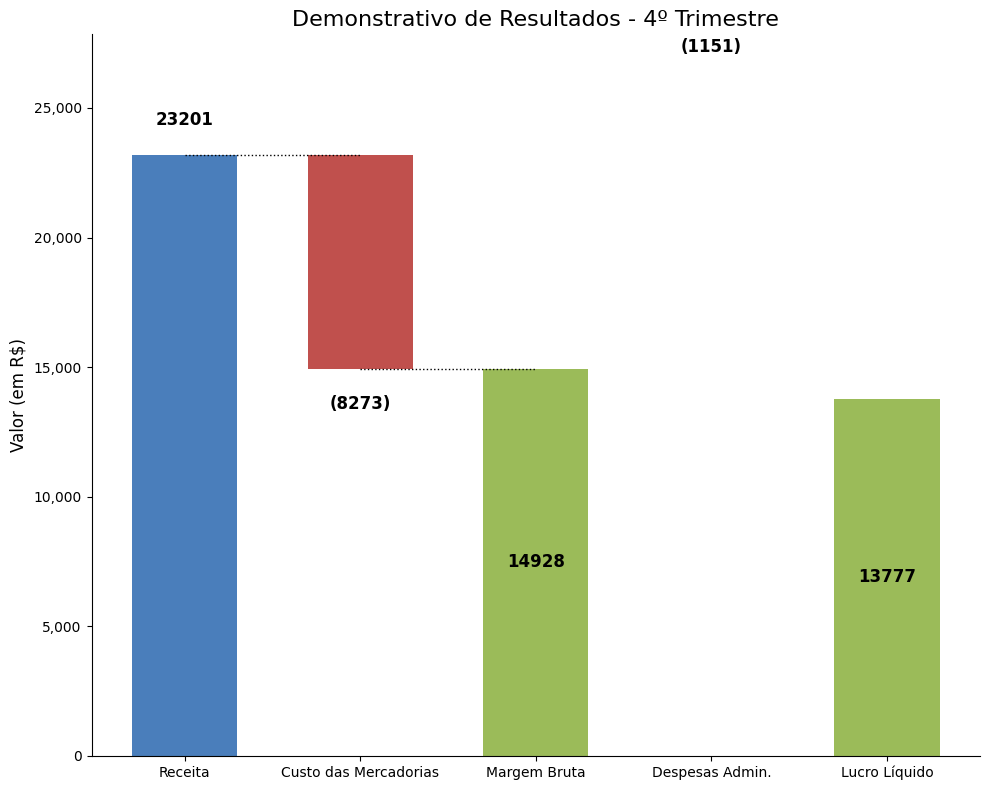

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

index = ['Receita', 'Custo das Mercadorias', 'Margem Bruta', 
         'Despesas Admin.', 'Lucro Líquido']
data = {'Valor': [23201, -8273, 0, -1151, 0]}
df = pd.DataFrame(data, index=index)

# Identificar quais barras são totais/subtotais
df['é_total'] = [False, False, True, False, True]

# Construir a Cascata
# Calcular os valores acumulados e os totais
running_total = 0
for i, valor in enumerate(df['Valor']):
    if df['é_total'].iloc[i]:
        df.loc[df.index[i], 'Valor'] = running_total
    else:
        running_total += valor

# Calcular os 'bottoms' para as barras flutuantes
cumulative = df['Valor'].cumsum().shift(1).fillna(0)

# Corrigir o valor dos totais para não serem cumulativos
for i, is_total in enumerate(df['é_total']):
    if is_total:
        cumulative.iloc[i] = 0

# Definir as cores
colors = []
for i, v in enumerate(df['Valor']):
    if df['é_total'].iloc[i]:
        colors.append('#9BBB59') # Verde para totais
    elif v > 0:
        colors.append('#4A7EBB') # Azul para aumentos
    else:
        colors.append('#C0504D') # Vermelho para diminuições

fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.bar(df.index, df['Valor'], bottom=cumulative, color=colors, width=0.6)

# Adicionar os valores nas barras
prev_total = 0
for i, bar in enumerate(bars):
    yval = bar.get_height()
    is_total_bar = df['é_total'].iloc[i]

    if is_total_bar:
        label = f"{int(yval)}"
        prev_total = yval
    else:
        label = f"({abs(int(yval))})" if yval < 0 else f"{int(yval)}"
        prev_total += yval
    
    y_pos = bar.get_y() + yval / 2 if is_total_bar else bar.get_y() + yval + np.sign(yval) * 1000
    va_align = 'center' if is_total_bar else 'bottom' if yval > 0 else 'top'
    
    ax.text(bar.get_x() + bar.get_width()/2, y_pos, label, ha='center', va=va_align, fontsize=12, fontweight='bold')

# Adicionar linhas de conexão
cumulative_values = df['Valor'].cumsum()
for i in range(len(df) - 1):
    if not df['é_total'].iloc[i]:
        plt.plot([i, i+1], [cumulative_values.iloc[i], cumulative_values.iloc[i]], 'k', linestyle=':', linewidth=1)

plt.title('Demonstrativo de Resultados - 4º Trimestre', fontsize=16)
plt.ylabel('Valor (em R$)', fontsize=12)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylim(0, df.loc['Receita', 'Valor'] * 1.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## 9. Gráfico de Funil

**Descrição**

Um gráfico de funil é um tipo de diagrama que mostra o fluxo de usuários através de um processo de conversão. Cada estágio do processo é representado por uma seção proporcional do funil, que é mais larga na parte superior e mais estreita na parte inferior. Essa forma ilustra a diminuição no número de usuários ou itens que ocorre em cada estágio do processo.

---

**Quando usar gráficos de funil?**

* Ao visualizar um processo ou sistema com estágios que têm quantidades decrescentes (ex: funil de recrutamento, funil de vendas).
* Se estiver acompanhando o sucesso de um funil de marketing, desde o primeiro contato com o cliente até a conversão final.
* Quando deseja identificar "gargalos" ou áreas problemáticas nos processos de uma organização, ou seja, as etapas com as maiores perdas.

---

**Melhores práticas para gráficos de funil**

* **Rotule claramente:** Cada estágio do funil deve ter um rótulo claro e o valor correspondente.
* **Use cores diferentes:** Cores distintas ajudam a diferenciar visualmente cada estágio do processo.
* **Garanta a proporcionalidade:** A largura de cada segmento do funil deve representar com precisão a proporção do todo naquele estágio.

> **Dica profissional de Andy Morris (Especialista em Marketing de Produtos):**
> “Gráficos de funil podem representar dados de forma que seja fácil de ler, entender e identificar áreas problemáticas. Eles são adequados para ilustrar etapas conectadas e sequenciais em um processo linear.”

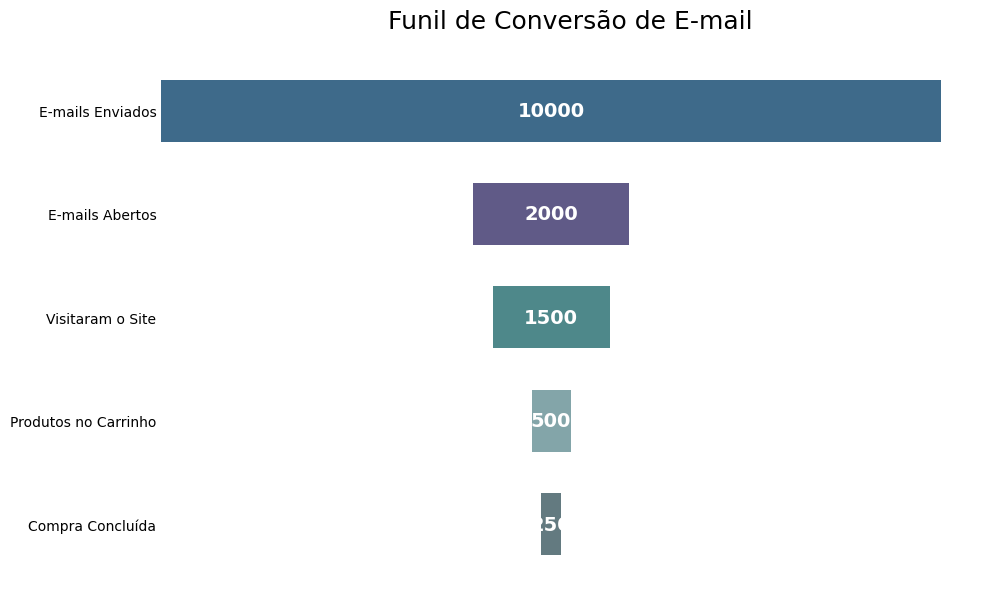

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para cada estágio do funil de conversão de e-mail
estagios = ['E-mails Enviados', 'E-mails Abertos', 'Visitaram o Site', 'Produtos no Carrinho', 'Compra Concluída']
valores = np.array([10000, 2000, 1500, 500, 250])

# O truque é criar um gráfico de barras horizontais e centralizar cada barra.
max_valor = valores[0]
barras_centralizadas_inicio = (max_valor - valores) / 2

# Cores para cada estágio do funil
cores = ['#3E6A8A', '#605A87', '#4E888A', '#83A5A9', '#637A80']

fig, ax = plt.subplots(figsize=(10, 6))

# Plotar cada barra horizontalmente
for i, valor in enumerate(valores):
    ax.barh(estagios[i], valor, left=barras_centralizadas_inicio[i], color=cores[i], height=0.6)
    # Adicionar o texto com o valor no centro de cada barra
    ax.text(max_valor / 2, i, f'{valor}', ha='center', va='center', color='white', fontsize=14, fontweight='bold')

# Inverter o eixo Y para que o funil comece de cima para baixo
ax.invert_yaxis()

# Título
plt.title('Funil de Conversão de E-mail', fontsize=18, pad=20)

# Remover os eixos e bordas para um visual mais limpo, como no exemplo
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.tick_params(axis='y', length=0)

plt.tight_layout()
plt.show()

## 10. Gráfico de Caixa

**Descrição**

O Box Plot (também conhecido como diagrama de caixa ou box-and-whisker plot) é uma ferramenta gráfica para representar a distribuição de um conjunto de dados numéricos através de seus quartis. Ele exibe um resumo de cinco números de um conjunto de dados: o mínimo, o primeiro quartil (Q1), a mediana (Q2), o terceiro quartil (Q3) e o máximo. A "caixa" central representa o intervalo interquartil (IQR), que contém os 50% centrais dos dados.

---

**Quando usar um Box Plot?**

* Para entender a dispersão, a simetria e a tendência central de um conjunto de dados.
* Quando se deseja comparar a distribuição de dados entre múltiplas categorias de forma rápida e visual.
* Para identificar a presença de **outliers** (valores atípicos), que são os pontos que aparecem fora das "hastes" (whiskers) do gráfico.

---

**Melhores práticas para Box Plots**

* **Use para dados numéricos contínuos:** O Box Plot é projetado para analisar a distribuição de variáveis numéricas.
* **Ordene as categorias:** Se as categorias no eixo X tiverem uma ordem lógica, organize-as dessa forma.
* **Combine com outros gráficos:** Para uma análise mais rica, às vezes é útil sobrepor os pontos de dados reais sobre o Box Plot (usando um swarmplot ou stripplot) para ver a distribuição de cada ponto individual.

> **Dica profissional:**
> “Box plots são mais poderosos que gráficos de barras com médias quando se trata de comparar grupos. Enquanto a média pode ser distorcida por outliers, a mediana (a linha central do box plot) é uma medida de tendência central muito mais robusta. Além disso, eles mostram a variabilidade (o tamanho da caixa) de forma clara, algo que um simples gráfico de barras não faz.”

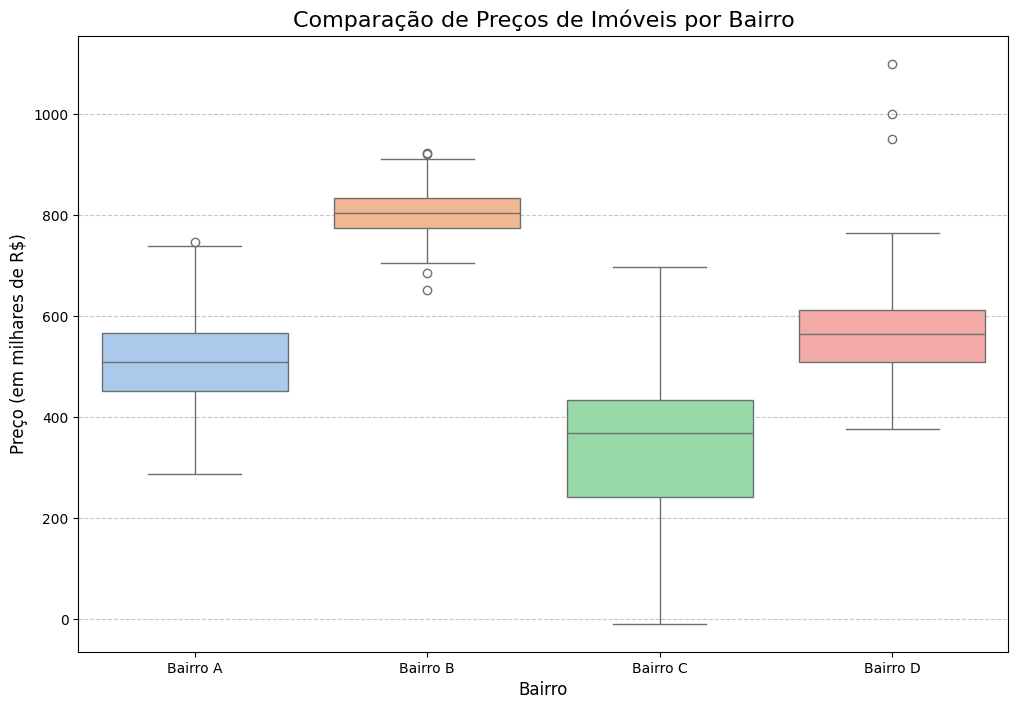

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Simulando a distribuição de preços de imóveis em 4 bairros diferentes.
np.random.seed(10)
num_imoveis_por_bairro = 100

# Bairro A: Preços medianos, dispersão normal
precos_a = np.random.normal(loc=500, scale=100, size=num_imoveis_por_bairro)

# Bairro B: Preços altos, pouca dispersão (bairro nobre e homogêneo)
precos_b = np.random.normal(loc=800, scale=50, size=num_imoveis_por_bairro)

# Bairro C: Preços baixos, alta dispersão (bairro com grande variedade de imóveis)
precos_c = np.random.normal(loc=350, scale=150, size=num_imoveis_por_bairro)

# Bairro D: Preços medianos, mas com alguns outliers de luxo
precos_d = np.random.normal(loc=550, scale=80, size=num_imoveis_por_bairro)
precos_d = np.append(precos_d, [950, 1000, 1100]) # Adicionando outliers

# Organizar os dados em um DataFrame para o Seaborn
bairros = ['Bairro A'] * num_imoveis_por_bairro + \
          ['Bairro B'] * num_imoveis_por_bairro + \
          ['Bairro C'] * num_imoveis_por_bairro + \
          ['Bairro D'] * len(precos_d) # Bairro D tem mais imóveis por causa dos outliers
          
precos = np.concatenate([precos_a, precos_b, precos_c, precos_d])

df_imoveis = pd.DataFrame({'Bairro': bairros, 'Preço (em milhares de R$)': precos})

plt.figure(figsize=(12, 8))
sns.boxplot(x='Bairro', y='Preço (em milhares de R$)', data=df_imoveis, hue='Bairro', palette='pastel', legend=False)

plt.title('Comparação de Preços de Imóveis por Bairro', fontsize=16)
plt.xlabel('Bairro', fontsize=12)
plt.ylabel('Preço (em milhares de R$)', fontsize=12)

# Adicionar um grid para facilitar a leitura dos valores
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()